In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset using the raw content URL
df = pd.read_csv('https://raw.githubusercontent.com/therealzella/IDS706_Cloud-Hosted_Notebook_Data_Manipulation/main/cereal.csv')

# Display the first few rows
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [2]:
print(df['mfr'].value_counts())

mfr
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: count, dtype: int64


In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df.isnull().sum()

,0
name,0
mfr,0
type,0
calories,0
protein,0
fat,0
sodium,0
fiber,0
carbo,0
sugars,0


In [5]:
df['sugar_fiber_ratio'] = df['sugars'] / (df['fiber'] + 1)  # Adding 1 to avoid division by zero

In [6]:
print(df['sugar_fiber_ratio'])

0      0.545455
1      2.666667
2      0.500000
3      0.000000
4      4.000000
        ...    
72     3.000000
73    12.000000
74     0.750000
75     0.750000
76     4.000000
Name: sugar_fiber_ratio, Length: 77, dtype: float64


In [7]:
conditions = [
    (df['calories'] < 100),
    (df['calories'] >= 100) & (df['calories'] < 150),
    (df['calories'] >= 150)
]
choices = ['Low', 'Medium', 'High']  # All choices are now strings

# Apply np.select with a default value that's also a string
df['calorie_category'] = np.select(conditions, choices, default='Unknown')

print(df['calorie_category'])


0        Low
1     Medium
2        Low
3        Low
4     Medium
       ...  
72    Medium
73    Medium
74    Medium
75    Medium
76    Medium
Name: calorie_category, Length: 77, dtype: object


In [8]:
high_protein_cereals = df[df['protein'] > 4]
print(high_protein_cereals)

              name mfr type  calories  protein  fat  sodium  fiber  carbo  \
11        Cheerios   G    C       110        6    2     290    2.0   17.0   
57  Quaker Oatmeal   Q    H       100        5    2       0    2.7   -1.0   
67       Special K   K    C       110        6    0     230    1.0   16.0   

    sugars  potass  vitamins  shelf  weight  cups     rating  \
11       1     105        25      1     1.0  1.25  50.764999   
57      -1     110         0      1     1.0  0.67  50.828392   
67       3      55        25      1     1.0  1.00  53.131324   

    sugar_fiber_ratio calorie_category  
11           0.333333           Medium  
57          -0.270270           Medium  
67           1.500000           Medium  


In [9]:
avg_calories_by_manufacturer = df.groupby('mfr')['calories'].mean()
print(avg_calories_by_manufacturer)

mfr
A    100.000000
G    111.363636
K    108.695652
N     86.666667
P    108.888889
Q     95.000000
R    115.000000
Name: calories, dtype: float64


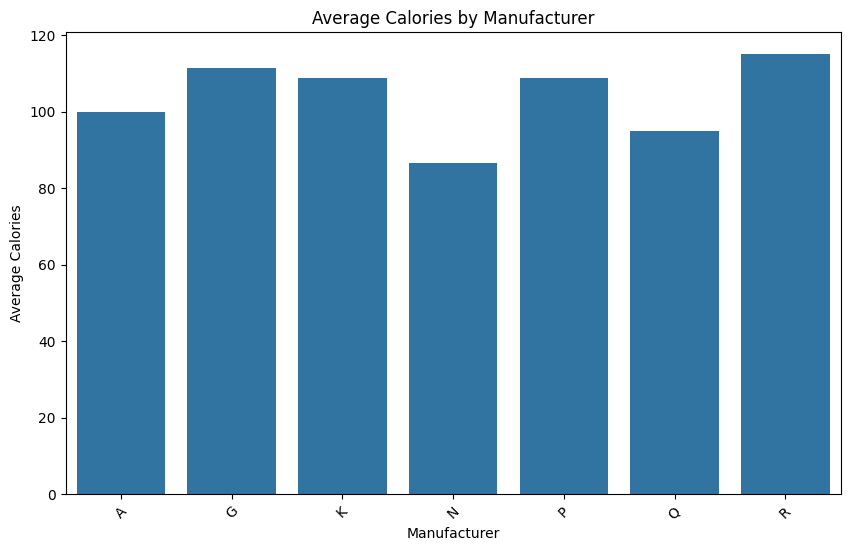

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_calories_by_manufacturer.index, y=avg_calories_by_manufacturer.values)
plt.xlabel('Manufacturer')
plt.ylabel('Average Calories')
plt.title('Average Calories by Manufacturer')
plt.xticks(rotation=45)
plt.show()